# Тема “Обучение без учителя”

## Задание 1
- Импортируйте библиотеки pandas, numpy и matplotlib.
- Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
- Создайте датафреймы X и y из этих данных.
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
- Масштабируйте данные с помощью StandardScaler .
- Постройте модель TSNE на тренировочный данных с параметрами:
- - n_components=2, learning_rate=250, random_state=42.
- Постройте диаграмму рассеяния на этих данных.

In [1]:
# Импортируйте библиотеки pandas, numpy и matplotlib.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston

In [2]:
# Создайте датафреймы X и y из этих данных.
boston = load_boston()
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

In [3]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# Масштабируйте данные с помощью StandardScaler.

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


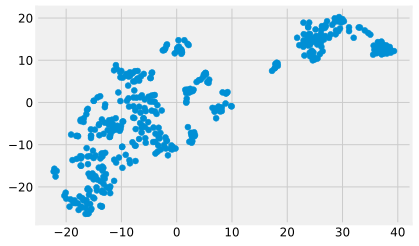

In [6]:
# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
- С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
- Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрась те точки из разных кластеров разными цветами.
- Вычислите средние значения price и CRIM в разных кластерах.


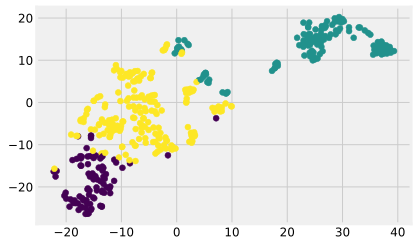

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [8]:
# Вычислите средние значения price и CRIM в разных кластерах.
print(f'Средняя цена в обучающей выборке:\t{y_train["price"].mean():.02f}')
print(f'Средняя цена 1-го кластера:\t\t{y_train.loc[labels_train == 0, "price"].mean():.02f}')
print(f'Средняя цена 2-го кластера:\t\t{y_train.loc[labels_train == 1, "price"].mean():.02f}')
print(f'Средняя цена 3-го кластера:\t\t{y_train.loc[labels_train == 2, "price"].mean():.02f}')

Средняя цена в обучающей выборке:	22.80
Средняя цена 1-го кластера:		27.79
Средняя цена 2-го кластера:		16.17
Средняя цена 3-го кластера:		24.96


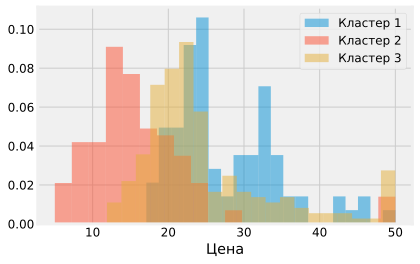

In [9]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('Цена')

plt.show()

In [10]:
print(f'Средний уровень преступности в обучающей выборке:\t{X_train["CRIM"].mean():.02f}')
print(f'Средний уровень преступности 1-го кластера:\t\t{X_train.loc[labels_train == 0, "CRIM"].mean():.02f}')
print(f'Средний уровень преступности 2-го кластера:\t\t{X_train.loc[labels_train == 1, "CRIM"].mean():.02f}')
print(f'Средний уровень преступности 3-го кластера:\t\t{X_train.loc[labels_train == 2, "CRIM"].mean():.02f}')

Средний уровень преступности в обучающей выборке:	3.61
Средний уровень преступности 1-го кластера:		0.07
Средний уровень преступности 2-го кластера:		10.80
Средний уровень преступности 3-го кластера:		0.42


## *Задание 3
- Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
- Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [11]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
labels_test = kmeans.predict(X_test_scaled)

In [12]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
print(f'Средняя цена в тестовой выборке:\t{y_test["price"].mean():.02f}')
print(f'Средняя цена 1-го кластера:\t\t{y_test.loc[labels_test == 0, "price"].mean():.02f}')
print(f'Средняя цена 2-го кластера:\t\t{y_test.loc[labels_test == 1, "price"].mean():.02f}')
print(f'Средняя цена 3-го кластера:\t\t{y_test.loc[labels_test == 2, "price"].mean():.02f}')

Средняя цена в тестовой выборке:	21.49
Средняя цена 1-го кластера:		31.35
Средняя цена 2-го кластера:		16.44
Средняя цена 3-го кластера:		21.86


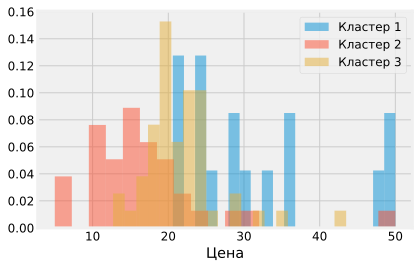

In [13]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('Цена')

plt.show()

In [14]:
print(f'Средний уровень преступности в тестовой выборке:\t{X_test["CRIM"].mean():.02f}')
print(f'Средний уровень преступности 1-го кластера:\t\t{X_test.loc[labels_test == 0, "CRIM"].mean():.02f}')
print(f'Средний уровень преступности 2-го кластера:\t\t{X_test.loc[labels_test == 1, "CRIM"].mean():.02f}')
print(f'Средний уровень преступности 3-го кластера:\t\t{X_test.loc[labels_test == 2, "CRIM"].mean():.02f}')

Средний уровень преступности в тестовой выборке:	3.63
Средний уровень преступности 1-го кластера:		0.06
Средний уровень преступности 2-го кластера:		10.17
Средний уровень преступности 3-го кластера:		0.27


## *Построим модель на всех данных. Для оценки качества модели будем использовать r2_score.*


In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_test_pred = lr.predict(X_test_scaled)
r2_score(y_test, y_test_pred)

0.668759493535632

## *Мы получили базовое значение. Построим теперь разные модели для объектов разных кластеров и посмотрим, какое качество мы сможем получить на них.*

### - Модель для кластера 1:

In [16]:
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])
r2_score(y_test[labels_test == 0], y_test_pred_0)

0.9155161972050824

### - Модель для кластера 2:

In [17]:
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])
r2_score(y_test[labels_test == 1], y_test_pred_1)

0.522832708076564

### - Модель для кластера 3:

In [18]:
lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])
y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])
r2_score(y_test[labels_test == 2], y_test_pred_2)

0.7215240423132002

## *Соберём теперь данные по кусочкам и проверим значение r2_score.*

In [19]:
y_test_all = np.vstack((y_test[labels_test == 0], y_test[labels_test == 1], y_test[labels_test == 2]))
y_test_pred_all = np.vstack((y_test_pred_0, y_test_pred_1, y_test_pred_2))
r2_score(y_test_all, y_test_pred_all)

0.7954214722324011

## *Теперь можно утверждать, что мы получили значительно более высокий показатель r2_score, применив информацию, полученную с помощью t-SNE и K-means.*